## Customer Lifetime Value Prediction

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('master.csv')

In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,order_item_id,...,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,year,month,month/y,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000000000,2017-10-02 11:07:15.000000000,2017-10-04 19:55:00.000000000,2017-10-10 21:25:13.000000000,2017-10-18 00:00:00.000000000,8 days 10:28:40.000000000,1,...,sao paulo,SP,9350,maua,SP,housewares,2017,October,Oct2017,Monday
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31.000000000,2017-08-15 20:05:16.000000000,2017-08-17 15:28:33.000000000,2017-08-18 14:44:43.000000000,2017-08-28 00:00:00.000000000,2 days 20:15:12.000000000,1,...,sao paulo,SP,9350,maua,SP,housewares,2017,August,Aug2017,Tuesday
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47.000000000,2017-08-02 18:43:15.000000000,2017-08-04 17:35:43.000000000,2017-08-07 18:30:01.000000000,2017-08-15 00:00:00.000000000,5 days 00:05:14.000000000,1,...,sao paulo,SP,9350,maua,SP,housewares,2017,August,Aug2017,Wednesday
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46.000000000,2017-10-25 02:14:11.000000000,2017-10-27 16:48:46.000000000,2017-11-07 18:04:59.000000000,2017-11-13 00:00:00.000000000,14 days 18:38:13.000000000,1,...,florianopolis,SC,9350,maua,SP,housewares,2017,October,Oct2017,Monday
4,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28.000000000,2017-08-24 11:45:25.000000000,2017-08-25 14:17:55.000000000,2017-08-28 20:12:20.000000000,2017-09-14 00:00:00.000000000,4 days 08:40:52.000000000,2,...,sao paulo,SP,9350,maua,SP,housewares,2017,August,Aug2017,Thursday


In [5]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_delivery_time', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english', 'year', 'month',
       'month/y', 'weekday'],
      dtype='object')

In [6]:
df = df[['customer_unique_id', 'order_purchase_timestamp','order_id', 
         'order_item_id', 'payment_value','order_status']]

In [7]:
df.head()

,customer_unique_id,order_purchase_timestamp,order_id,order_item_id,payment_value,order_status
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33.000000000,e481f51cbdc54678b7cc49136f2d6af7,1,18.12,delivered
1,3a51803cc0d012c3b5dc8b7528cb05f7,2017-08-15 18:29:31.000000000,128e10d95713541c87cd1a2e48201934,1,37.77,delivered
2,ef0996a1a279c26e7ecbd737be23d235,2017-08-02 18:24:47.000000000,0e7e841ddf8f8f2de2bad69267ecfbcf,1,37.77,delivered
3,e781fdcc107d13d865fc7698711cc572,2017-10-23 23:26:46.000000000,bfc39df4f36c3693ff3b63fcbea9e90a,1,44.09,delivered
4,7a1de9bde89aedca8c5fbad489c5571c,2017-08-24 11:31:28.000000000,5f49f31e537f8f1a496454b48edbe34d,2,127.45,delivered


In [8]:
# Only keep delivered order for customer clustering
df = df.loc[df.order_status=='delivered']

In [9]:
df.drop(["order_status"], axis = 1, inplace = True) 
df.head()

,customer_unique_id,order_purchase_timestamp,order_id,order_item_id,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33.000000000,e481f51cbdc54678b7cc49136f2d6af7,1,18.12
1,3a51803cc0d012c3b5dc8b7528cb05f7,2017-08-15 18:29:31.000000000,128e10d95713541c87cd1a2e48201934,1,37.77
2,ef0996a1a279c26e7ecbd737be23d235,2017-08-02 18:24:47.000000000,0e7e841ddf8f8f2de2bad69267ecfbcf,1,37.77
3,e781fdcc107d13d865fc7698711cc572,2017-10-23 23:26:46.000000000,bfc39df4f36c3693ff3b63fcbea9e90a,1,44.09
4,7a1de9bde89aedca8c5fbad489c5571c,2017-08-24 11:31:28.000000000,5f49f31e537f8f1a496454b48edbe34d,2,127.45


In [10]:
# Change timestamp to datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [11]:
df['order_date'] = df.order_purchase_timestamp.dt.date 

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [13]:
df.drop(["order_purchase_timestamp"], axis = 1, inplace = True) 
df.head()

,customer_unique_id,order_id,order_item_id,payment_value,order_date
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,1,18.12,2017-10-02
1,3a51803cc0d012c3b5dc8b7528cb05f7,128e10d95713541c87cd1a2e48201934,1,37.77,2017-08-15
2,ef0996a1a279c26e7ecbd737be23d235,0e7e841ddf8f8f2de2bad69267ecfbcf,1,37.77,2017-08-02
3,e781fdcc107d13d865fc7698711cc572,bfc39df4f36c3693ff3b63fcbea9e90a,1,44.09,2017-10-23
4,7a1de9bde89aedca8c5fbad489c5571c,5f49f31e537f8f1a496454b48edbe34d,2,127.45,2017-08-24


In [ ]:
# 'For year 2017'
start_date = '01-01-17'
end_date = '31-12-17'

start_date =  datetime.datetime.strptime(start_date, '%d-%m-%y').date()
end_date =  datetime.datetime.strptime(end_date, '%d-%m-%y').date()

In [ ]:
dff = df.loc[(df['order_date'].dt.date >= start_date)
                    & (df['order_date'].dt.date <= end_date)]

### Calculation of certain features
- No. of days between the present date and the date of last purchase from each customer.
- No. of orders placed by each customer
- No. of items bought by each customer 
- Sum of purchase payment for each customer.

In [14]:
# Ref: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
df_grp = df.groupby('customer_unique_id').agg(
    num_days = pd.NamedAgg(column='order_date', aggfunc=lambda date: (date.max() - date.min()).days),
             # Get number of days between orders for each customer,
    num_transactions = pd.NamedAgg(column='order_id', aggfunc=lambda num: len(num)),
             # Get number of trasactions
    num_units = pd.NamedAgg(column='order_item_id', aggfunc=lambda quant: quant.sum()),
             # Get number of items ordered
    spent_money = pd.NamedAgg(column='payment_value', aggfunc=lambda price: price.sum())
             # Get amount spent
)

In [15]:
df_grp.head()

,num_days,num_transactions,num_units,spent_money
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,1,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,0,1,1,27.19
0000f46a3911fa3c0805444483337064,0,1,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,0,1,1,43.62
0004aac84e0df4da2b147fca70cf8255,0,1,1,196.89


### Calculate CLTV using following formula:
- CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
- Customer Value = Average Order Value * Purchase Frequency

#### Aggregate Model

In [16]:
# Calculate Average Order Value = Total Revenue / Total Number of Orders
df_grp['avg_order_value']=df_grp['spent_money']/df_grp['num_transactions']
df_grp.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,1,1,141.90,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,0,1,1,27.19,27.19
0000f46a3911fa3c0805444483337064,0,1,1,86.22,86.22
0000f6ccb0745a6a4b88665a16c9f078,0,1,1,43.62,43.62
0004aac84e0df4da2b147fca70cf8255,0,1,1,196.89,196.89


In [17]:
df_grp.shape[0]

92065

In [18]:
# Calculate Purchase Frequency =  Total Number of Orders / Total Number of Customers
purchase_frequency=sum(df_grp['num_transactions'])/df_grp.shape[0]

In [19]:
# Calculate Repeat Rate and Churn Rate
repeat_rate=df_grp[df_grp.num_transactions > 1].shape[0]/df_grp.shape[0]
churn_rate=1-repeat_rate

In [20]:
purchase_frequency,repeat_rate,churn_rate

(1.0330961820452942, 0.029772443382392873, 0.9702275566176072)

In [ ]:
 # Customer Lifetime=1/Churn Rate

In [71]:
# Calculate Profit margin (profitability ratio): assume approx 5% profit on the total sales
df_grp['profit_margin']=0.05
df_grp.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,customer_value,customer_lifetime_value
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,1,1,141.90,141.90,0.05,151.094810,1072.017676
0000b849f77a49e4a4ce2b2a4ca5be3f,0,1,1,27.19,27.19,0.05,28.951853,39.360044
0000f46a3911fa3c0805444483337064,0,1,1,86.22,86.22,0.05,91.806868,395.779406
0000f6ccb0745a6a4b88665a16c9f078,0,1,1,43.62,43.62,0.05,46.446481,101.299774
0004aac84e0df4da2b147fca70cf8255,0,1,1,196.89,196.89,0.05,209.648042,2063.880147


In [72]:
# Calcualte Customer Value
df_grp['customer_value']=(df_grp['avg_order_value']*purchase_frequency)/churn_rate

In [73]:
# Calcualte Customer Lifetime Value
df_grp['customer_lifetime_value']=df_grp['customer_value']*df_grp['profit_margin']
df_grp.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,customer_value,customer_lifetime_value
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0,1,1,141.90,141.90,0.05,151.094810,7.554740
0000b849f77a49e4a4ce2b2a4ca5be3f,0,1,1,27.19,27.19,0.05,28.951853,1.447593
0000f46a3911fa3c0805444483337064,0,1,1,86.22,86.22,0.05,91.806868,4.590343
0000f6ccb0745a6a4b88665a16c9f078,0,1,1,43.62,43.62,0.05,46.446481,2.322324
0004aac84e0df4da2b147fca70cf8255,0,1,1,196.89,196.89,0.05,209.648042,10.482402


In [74]:
df_grp['spent_money'].describe()

count    92065.000000
mean       162.606827
std        223.777189
min          0.010000
25%         61.400000
50%        105.900000
75%        180.620000
max      13664.080000
Name: spent_money, dtype: float64

#### Cohort Model

In [66]:
# Ref: https://www.analyticsvidhya.com/blog/2020/10/a-definitive-guide-for-predicting-customer-lifetime-value-clv/
df_grp1 = df.groupby('customer_unique_id').agg(
    start_month = pd.NamedAgg(column='order_date', aggfunc=lambda date: date.min().month),
             # Get number of days between orders for each customer,
    num_transactions = pd.NamedAgg(column='order_id', aggfunc=lambda num: len(num)),
             # Get number of trasactions
    num_units = pd.NamedAgg(column='order_item_id', aggfunc=lambda quant: quant.sum()),
             # Get number of items ordered
    spent_money = pd.NamedAgg(column='payment_value', aggfunc=lambda price: price.sum())
             # Get amount spent
)

In [67]:
df_grp1.head()

,start_month,num_transactions,num_units,spent_money
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,5,1,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,5,1,1,27.19
0000f46a3911fa3c0805444483337064,3,1,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,10,1,1,43.62
0004aac84e0df4da2b147fca70cf8255,11,1,1,196.89


In [68]:
# Calculating CLV for each cohort
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_CLV = []

for i in range(1, 13):
    df_grp1_m = df_grp1[df_grp1['start_month']==i]
    
    Average_order_value = round(np.mean(df_grp1_m['spent_money']/df_grp1_m['num_transactions']),2)
    
    Purchase_freq = round(np.mean(df_grp1_m['num_transactions']), 2)
    
    Retention_rate = df_grp1_m[df_grp1_m.num_transactions > 1].shape[0]/df_grp1_m.shape[0]
    churn = round(1 - Retention_rate, 2)
    
    Profit_margin = 0.05
    
    CLV = round(((Average_order_value * Purchase_freq)/churn) * Profit_margin, 2)
    
    Monthly_CLV.append(CLV)

In [69]:
monthly_clv = pd.DataFrame(zip(months, Monthly_CLV), columns=['Months', 'CLV'])
display(monthly_clv.style.background_gradient())

,Months,CLV
0,Jan,8.150000
1,Feb,8.090000
2,March,8.440000
3,Apr,8.760000
4,May,8.620000
5,Jun,8.520000
6,Jul,8.350000
7,Aug,8.050000
8,Sep,9.130000
9,Oct,8.900000


we have 12 different CLV value for 12 months from Jan-Dec. And customers who are acquired in different months have different CLV values attached to them. This is because, they could be acquired using different campaigns, etc., so their behavior might be different from others.

Also, if you look at the values for September and October, the CLV values are quite high.

### Predict CLV using Linear Regression Model

In [75]:
# Extract month and year from order_date
df['month_yr'] = df['order_date'].apply(lambda x: x.strftime('%b-%Y'))
df.head()

,customer_unique_id,order_id,order_item_id,payment_value,order_date,month_yr
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,1,18.12,2017-10-02,Oct-2017
1,3a51803cc0d012c3b5dc8b7528cb05f7,128e10d95713541c87cd1a2e48201934,1,37.77,2017-08-15,Aug-2017
2,ef0996a1a279c26e7ecbd737be23d235,0e7e841ddf8f8f2de2bad69267ecfbcf,1,37.77,2017-08-02,Aug-2017
3,e781fdcc107d13d865fc7698711cc572,bfc39df4f36c3693ff3b63fcbea9e90a,1,44.09,2017-10-23,Oct-2017
4,7a1de9bde89aedca8c5fbad489c5571c,5f49f31e537f8f1a496454b48edbe34d,2,127.45,2017-08-24,Aug-2017


In [76]:
# Create pivot table for sales
sale = df.pivot_table(index=['customer_unique_id'],
                      columns=['month_yr'],
                      values='payment_value',
                      aggfunc='sum',fill_value=0).reset_index()
sale.head()

month_yr,customer_unique_id,Apr-2017,Apr-2018,Aug-2017,Aug-2018,Dec-2016,Dec-2017,Feb-2017,Feb-2018,Jan-2017,...,Jun-2017,Jun-2018,Mar-2017,Mar-2018,May-2017,May-2018,Nov-2017,Oct-2016,Oct-2017,Sep-2017
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,141.90,0.00,0.0,0.00,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,27.19,0.00,0.0,0.00,0.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,86.22,0.0,0.0,0.00,0.00,0.0,0.00,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,43.62,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,196.89,0.0,0.00,0.0


In [77]:
# Sum all the monthly sales
sale['customer_value']=sale.iloc[:,2:].sum(axis=1)
sale.columns

Index(['customer_unique_id', 'Apr-2017', 'Apr-2018', 'Aug-2017', 'Aug-2018',
       'Dec-2016', 'Dec-2017', 'Feb-2017', 'Feb-2018', 'Jan-2017', 'Jan-2018',
       'Jul-2017', 'Jul-2018', 'Jun-2017', 'Jun-2018', 'Mar-2017', 'Mar-2018',
       'May-2017', 'May-2018', 'Nov-2017', 'Oct-2016', 'Oct-2017', 'Sep-2017',
       'customer_value'],
      dtype='object', name='month_yr')

In [78]:
sale.head()

month_yr,customer_unique_id,Apr-2017,Apr-2018,Aug-2017,Aug-2018,Dec-2016,Dec-2017,Feb-2017,Feb-2018,Jan-2017,...,Jun-2018,Mar-2017,Mar-2018,May-2017,May-2018,Nov-2017,Oct-2016,Oct-2017,Sep-2017,customer_value
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,141.90,0.00,0.0,0.00,0.0,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,27.19,0.00,0.0,0.00,0.0,27.19
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,86.22,0.0,0.0,0.00,0.00,0.0,0.00,0.0,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,43.62,0.0,43.62
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,196.89,0.0,0.00,0.0,196.89


In [79]:
# Select the latest 6 month as independent variable
X=sale[['Aug-2018','Jul-2018', 'Jun-2018','May-2018','Apr-2018','Mar-2018']]
y=sale[['customer_value']]

In [80]:
# Split Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [81]:
# Fit Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[105.10914202]
[[0.77623613 0.82523951 0.77704792 0.7858485  0.7801984  0.76200392]]


### Evaluate the linear model

In [82]:
# Compute the evaluation matrics
print("R-Square:", metrics.r2_score(y_test, y_pred))
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square: 0.32260315234432124
MAE: 90.25568919246989
MSE 35828.90814378877
RMSE: 189.28525601268782


In [83]:
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.32260315234432124


Not a good model

**Reference:** https://www.datacamp.com/community/tutorials/customer-life-time-value

Pros and Cons of CLTV --
CLTV helps you to design an effective business plan and also provide a chance to scale your business. CLTV draw meaningful customer segments these segment can help you to identify needs of the different-different segment.

Customer Lifetime Value is a tool, not a strategy. CLTV can figure out most profitable customers, but how you are going to make a profit from them, it depends on your strategy. Generally, CLTV models are confused and misused. Obsession with CLTV may create blinders. Companies only focus on finding the best customer group and focusing on them and repeat the business, but it’s also important to give attention to other customers.

### Predictive CLV using statistical models

Create a summary table from the transaction data. The summary table is nothing but an RFM table. (RFM — Recency, Frequency and Monetary value)

- frequency — the number of repeat purchases (more than 1 purchases)
- recency — the time between the first and the last transaction
- T — the time between the first purchase and the end of the transaction period (last date of the time frame considered for the analysis)
- monetary_value — it is the mean of a given customers sales value

In [87]:
from lifetimes.utils import summary_data_from_transaction_data
cutoff_date = df["order_date"].max() 
data = summary_data_from_transaction_data(
    df, 'customer_unique_id', 'order_date', 
    monetary_value_col='payment_value',
    observation_period_end = cutoff_date)
data.head()

,frequency,recency,T,monetary_value
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,111.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,114.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,537.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,321.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,288.0,0.0


The value of 0 in frequency and recency means that these are one-time buyers. Let’s check how many such one time buyers are there in our data.

count    92065.000000
mean         0.023668
std          0.175061
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 97.86 %


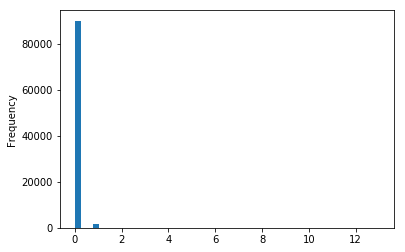

In [92]:
# Create a distribution of frequency to understand the customer frequence level
data['frequency'].plot(kind='hist', bins=50)
print(data['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(data['frequency'] == 0)/float(len(data))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

count    92065.000000
mean         2.618205
std         24.875477
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        633.000000
Name: recency, dtype: float64
---------------------------------------
97.85586270569706 2


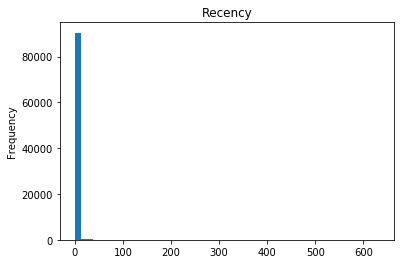

In [96]:
data['recency'].plot(kind='hist', bins=50)
plt.title('Recency')
print(data['recency'].describe())
print("---------------------------------------")
print(sum(data['recency'] == 0)/float(len(data))*(100),2)

#### Frequency/Recency Analysis Using the BG/NBD Model

In [97]:
# Fit a Beta-Geometric model to the data
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data['frequency'], data['recency'], data['T'])

<lifetimes.BetaGeoFitter: fitted with 92065 subjects, a: 2.12, alpha: 67.61, b: 0.36, r: 0.02>

In [94]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.015854,0.000866,0.014157,0.017551
alpha,67.609157,6.564003,54.743712,80.474602
a,2.115576,0.531595,1.073650,3.157502
b,0.362018,0.099544,0.166911,0.557124


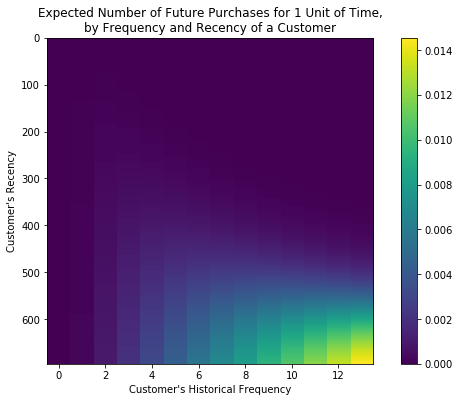

In [99]:
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(bgf)
plt.show()

We can see that, if a customer has made 12 purchases, and their latest purchase was when they were approximately 600 days old (i.e. Recency: the duration between their first transaction and their latest transaction is 600 days), then they are our best customer (bottom-right).

Customers who have purchased a lot and purchased recently will likely be the best customers in the future. We will never have enough of them.

Customers who have purchased a lot but not recently (top-right), have probably gone. There are also another type of customers that around (6, 500) that represents the customer who buys infrequently, and we have not seen them recently, so they might buy again. However, we are not sure if they have gone or just between purchases.

Another interesting matrix to look at is the probability of still being alive:

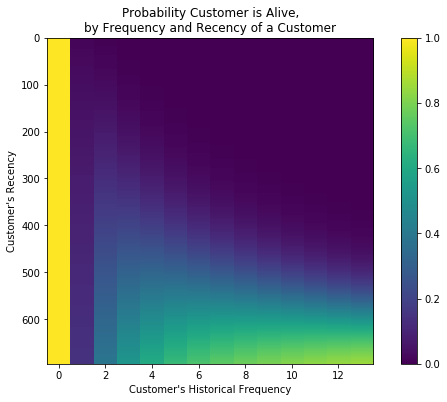

In [100]:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(10,6))
plot_probability_alive_matrix(bgf)
plt.show()

Customers who have purchased recently are almost surely “alive”.

Customers who have purchased a lot but not recently, are likely to have dropped out. And the more they bought in the past, the more likely they have dropped out. They are represented in the upper-right.

In [101]:
t = 10
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T'])
data.sort_values(by='predicted_purchases').tail(10)

,frequency,recency,T,monetary_value,predicted_purchases
customer_unique_id,,,,,
34b0cd95480e55c2a701293a2b9671b3,2.0,125.0,126.0,29.825000,0.039086
6a9e15d6fa8ce1cabf193c21aa577f64,2.0,63.0,87.0,148.725000,0.039171
fe81bb32c243a86b2f86fbf053fe6140,4.0,242.0,311.0,381.745000,0.043051
bc3e7032668d3f411c227eec09221362,2.0,59.0,75.0,72.535000,0.045270
394ac4de8f3acb14253c177f0e15bc58,3.0,236.0,250.0,191.276667,0.045750
ca77025e7201e3b30c44b472ff346268,6.0,235.0,324.0,138.941667,0.052524
e0836a97eaae86ac4adc26fbb334a527,2.0,62.0,64.0,32.955000,0.055854
6469f99c1f9dfae7733b25662e7f1782,5.0,282.0,344.0,133.412000,0.056854
dc813062e0fc23409cd255f7f53c7074,5.0,418.0,424.0,151.606000,0.066165


Listed above are our top 10 customers that the model expects them to make purchases in the next day. We can see that the customer who has made 13 purchases, and bought very recently from us, is probably going to buy again in the next period.

The predicted_purchases column represents their expected number of purchases while the other three columns represent their current RF metrics. The BG/NBD model believes these individuals will be making more purchases within the near future as they are our current best customers.

C:\ProgramData\Anaconda3\lib\site-packages\lifetimes\generate_data.py:54: RuntimeWarning: overflow encountered in double_scalars
  next_purchase_in = random.exponential(scale=1.0 / l)
C:\ProgramData\Anaconda3\lib\site-packages\lifetimes\generate_data.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  next_purchase_in = random.exponential(scale=1.0 / l)


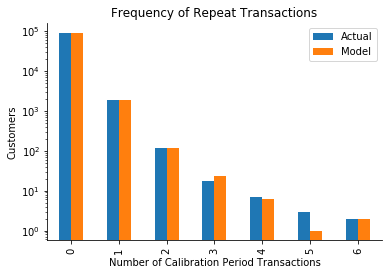

In [102]:
from lifetimes.plotting import plot_period_transactions
ax = plot_period_transactions(bgf, max_frequency=7)
ax.set_yscale('log')
sns.despine();

In [90]:
# Estimate sales revenue for each transaction by fitting spend data to Gamma-Gamma model

from lifetimes import GammaGammaFitter

returning_customers_summary = data[data['frequency'] > 0]

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])

transaction_spend = ggf.conditional_expected_average_profit(data['frequency'],
                                                            data['monetary_value']).mean()
print(transaction_spend)

147.5178760796386


According to this model, the expected revenue from each transaction is $147.51.